In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import sympy as smp
from sympy.vector import cross

In [2]:
t,zo,R,x,y,z = smp.symbols('t,zo,R,x,y,z')

In [3]:
l = smp.Matrix([R*smp.cos(t),smp.sin(t),zo]) # current loop(parametric)
r = smp.Matrix([x,y,z])                      # point where the field is measured 
s = (r-l)                                    # distance vector

In [4]:
integrand = smp.diff(l,t).cross(s)/s.norm()**3

In [5]:
dBxdt = smp.lambdify([t,x,y,z,zo,R],integrand[0])
dBydt = smp.lambdify([t,x,y,z,zo,R],integrand[1])
dBzdt = smp.lambdify([t,x,y,z,zo,R],integrand[2])

In [6]:
# B field created at (x,y,z)
def B(x,y,z,zo,R=1):
  return np.array([
      quad(dBxdt,0,2*np.pi,args=(x,y,z,zo,R))[0],
      quad(dBydt,0,2*np.pi,args=(x,y,z,zo,R))[0],
      quad(dBzdt,0,2*np.pi,args=(x,y,z,zo,R))[0]])

In [11]:
# feild at origin due to one current loop at z =0
B(0,0,0,0)

array([0.        , 0.        , 6.28318531])

In [8]:
# calculate the field due to Helholtz pair
z_coils =[-0.5,0.5]

In [9]:
# the net field created by current array of current loops along z 
def B_net(x,y,z,z_array,R=1):
  return np.sum(np.array([B(x,y,z,zo,R) for zo in z_array]),axis=0)


Text(0.5, 0, 'z(m)')

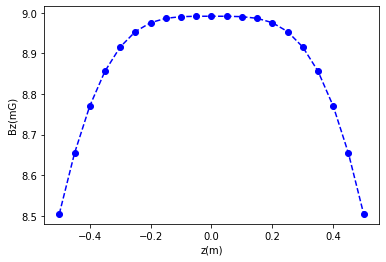

In [10]:
# plot the field along the z axis 
zz  = np.linspace(-0.5,0.5,21)
Bzz = np.array([B_net(0,0,z,z_coils) for z in zz]).T[2]
plt.plot(zz,Bzz,'bo--')
plt.ylabel('Bz(mG)')
plt.xlabel('z(m)')